In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_set = pd.read_csv('Churn_Modelling.csv')
data_set
data_set.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#Checking null values
data_set.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Drop unwanted columns
data_set.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data_set.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
data_set

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Conversion to numerical values

In [ ]:
data_set=pd.get_dummies(data_set,drop_first=True)
data_set.head()
data_set=data_set.astype(int)
data_set

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


Visualize data

In [ ]:
#Customer exited
data_set['Exited']

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
#Number of customer exited
data_set['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

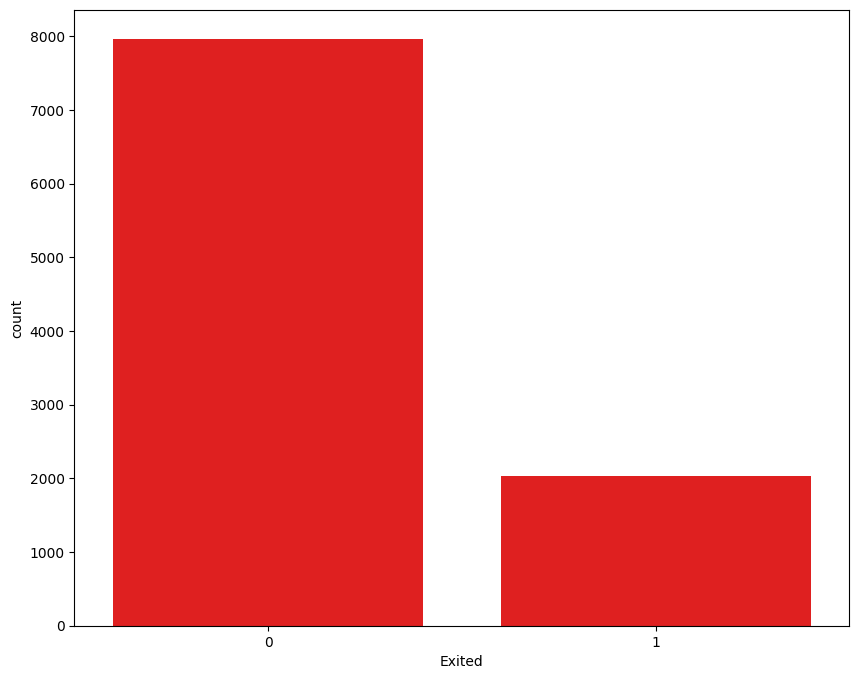

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Exited',data=data_set, color='red')

In [ ]:
X_data=data_set.drop('Exited',axis=1)
Y_data=data_set['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
!pip install imblearn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=42)
print('Training dimension: ', X_train.shape)
print('Testing dimension: ', X_test.shape)

Training dimension:  (9000, 11)
Testing dimension:  (1000, 11)


In [ ]:
scale= StandardScaler()
X_train_scale= scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [ ]:
X_train_scale

array([[-0.47944328,  0.19687202, -0.00234647, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 1.04580863,  1.33803657,  1.03625698, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [-0.85297437, -0.08841912,  1.03625698, ..., -0.5761528 ,
         1.73307782,  0.91105005],
       ...,
       [ 0.86941896, -0.08841912, -1.38715108, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [ 0.16386025,  0.38706611,  1.03625698, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 0.47513615,  1.14784248, -1.38715108, ...,  1.73565068,
        -0.57700814,  0.91105005]])

Implementing Logistic Regression

In [ ]:
thld=0.3
y_train_classified = [1 if value > thld else 0 for value in y_train]
lrm=LogisticRegression()
lrm.fit(X_train_scale, y_train_classified)

LogisticRegression()

In [ ]:
y_test_classified = [1 if value > thld else 0 for value in y_test]
accuracy1 = lrm.score(X_test_scale, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.809


Random Forest Model

In [ ]:
thld=0.3
y_train_classified = [1 if value > thld else 0 for value in y_train]
rfm= RandomForestClassifier()
rfm.fit(X_train_scale, y_train_classified)

RandomForestClassifier()

In [ ]:
y_test_classified = [1 if value > thld else 0 for value in y_test]
accuracy2 = rfm.score(X_test_scale, y_test_classified)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.867


In [ ]:
summary = pd.DataFrame({
    'Model':['Logistic Regression','Random Forest'],
    'ACC':[accuracy1,
           accuracy2
          ]
})
summary

,Model,ACC
0,Logistic Regression,0.809
1,Random Forest,0.867
